## This workbook is an answer to Part A of the Final Assignment

## Key Steps and sections are listed below. 
<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3.5>

A.  <a>Import all libraries to be used for assignment</a></br>
B.  <a>Download and Clean Dataset</a></br>
C.  <a>Split data to Train and Test Data</a></br>
D.  <a>Build a Neural Network</a></br>
E.  <a>Compute metrics and analyse </a></br>
  
</font>
</div>


## QUESTIONS
<div class="alert alert-block alert-success" style="margin-top: 20px">
 <font size = 3.5>
     
1.  <a href="https://#item31"> Split data to <b>Training and Test</b> data sets </a>  
2.  <a href="https://#item31"> Train model with on training data using <b>50 epochs</b> </a>
3.  <a href="https://#item31"> Evaluate model on Test data and calculate <b>mean square error (mse) </b> </a>     
3.  <a href="https://#item31"> Repeat Steps 1-3 <b> 50 times </b> </a>  
3.  <a href="https://#item31"> Report the  <b> mean and standard deviation of the mean squared errors </b> </a>  

  
</font>    

    
</div>

<a id="item31"></a>


## A. Import all libraries to be used for assignment


In [1]:
# Libraries for Data Wrangling and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Libraries for Modeling and Metrics
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
#This library is now imported for scores
from sklearn.model_selection import cross_val_score

## B. Download and inspect data to be used for modeling

Let's download the data and read it into a <em>pandas</em> dataframe.


In [2]:
concrete_data = pd.read_csv('concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa.


#### Let's check how many data points we have.


In [3]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


Let's check the dataset for any missing values.


In [4]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target using standard notation X for features and y for target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [6]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [7]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [9]:
# For the preparation of baseline model, we revert to standard notation X and y
X = predictors
y = target

<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Split data to Train and Test </b></center>
</div>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

**Scale data**

In [11]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance

#scaler=StandardScaler()
#scaler.fit(X_train)

#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled = (X_train - X_train.mean()) / X_train.std()
X_train_scaled.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
53,0.266702,-0.018875,-0.843322,2.222060,-1.036436,-0.551961,-1.342027,0.659200
526,0.795975,-0.662069,1.372000,-1.258957,0.722379,-0.420763,0.309775,-0.666024
860,0.362934,-0.876467,0.932078,-0.506305,0.577155,-0.643800,0.082810,-0.285212
453,-0.827448,-0.876467,1.123758,-0.666243,0.561019,1.376654,0.283296,0.141296
561,1.161654,-0.876467,-0.843322,0.232235,-1.036436,0.872853,-0.531257,-0.285212


In [13]:
X_test_scaled = (X_test - X_test.mean()) / X_test.std()
X_test_scaled.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
62,0.165838,-0.813545,-0.853483,0.398073,-1.056217,0.009456,1.021527,-0.705103
880,-1.336639,-0.813545,0.872433,0.025882,0.427541,0.267813,0.599118,-0.266436
520,-0.081405,-0.626044,1.319322,-0.206738,-0.036134,-1.577595,0.415993,-0.705103
195,-0.930590,-0.813545,0.695219,-0.830158,0.334806,0.444972,1.696648,-0.512089
127,0.249520,1.842722,-0.853483,-1.290745,1.595999,-1.453337,1.385335,-0.266436


Let's save the number of predictors to *n_cols* since we will need this number when building our network.


In [14]:
#n_cols = predictors_norm.shape[1] # number of predictorsX_train_scaled
n_cols = X_train_scaled.shape[1]
n_cols

8

<a id="item1"></a>


<a id='item32'></a>


<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Build Baseline Neural Network Model.</b></center>
</div>

**Assignment asks for Neural Network with the following parameters**

1.  <a>One hidden layer with 10 nodes</a></br>
2.  <a>adam optimizer and ReLu Activation</a></br>
3.  <a>mean squared error as loss function</a></br>

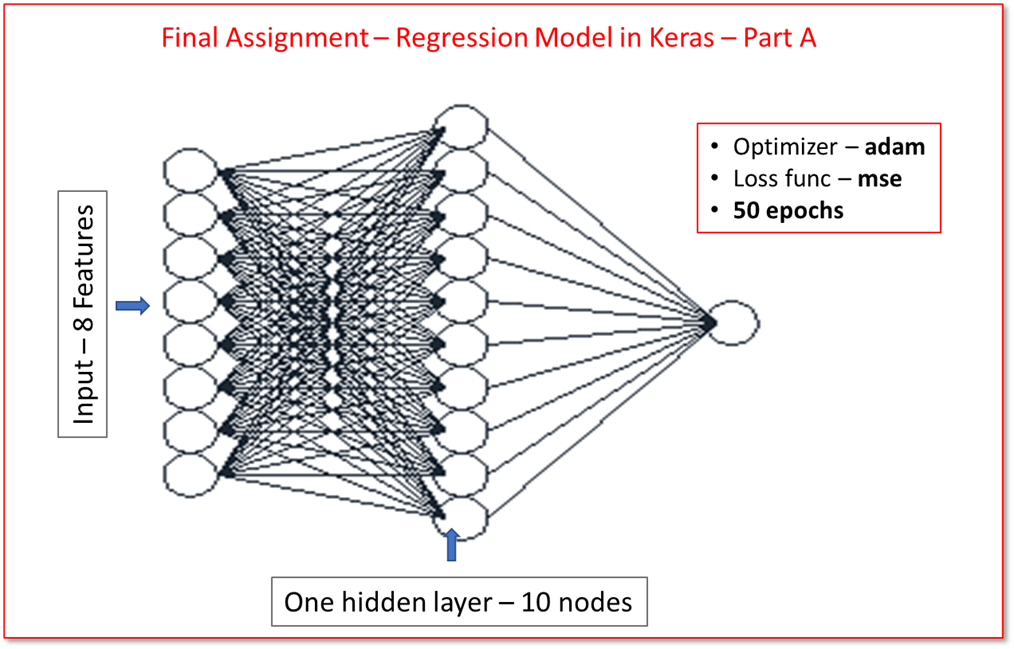

**Model function**

In [15]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    model.summary()
    return model

<a id='item34'></a>


### Build, Train and Test the model


In [16]:
# build the model
model = regression_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Train the model on training data using 50 epochs</b></center>
</div>

In [17]:
# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs = 50)

Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 32213.8867 - mae: 165.4125 - val_loss: 11445.8984 - val_mae: 92.5523
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 5874.3618 - mae: 57.0681 - val_loss: 2799.4294 - val_mae: 38.2269
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 3369.4451 - mae: 45.4256 - val_loss: 3021.0354 - val_mae: 43.6490
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 3183.2349 - mae: 44.2593 - val_loss: 2535.9182 - val_mae: 37.6965
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 2856.7998 - mae: 40.0657 - val_loss: 2383.7366 - val_mae: 35.2190
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 2669.8445 - mae: 38.6870 - val_loss: 2231.6604 - val_mae: 34.4710
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 2510.0437 - mae: 37.7566 - val_loss: 2085.1567 - val_mae: 33.5830
Epoch 8/50
16/16 [=============

<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Evaluate the model on test data, compute mse between predicted and actual concrete strength</b></center>
</div>

In [18]:
mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

10/10 [==============================] - 0s 997us/step - loss: 509.9062 - mae: 18.2423
Mean squared error from neural net:  509.9061584472656
Mean absolute error from neural net:  18.242313385009766


<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Further QC was also taken on the model performance and some charts were generated below</b></center>
</div>

**Plot of the loss function and mae are plotted below**

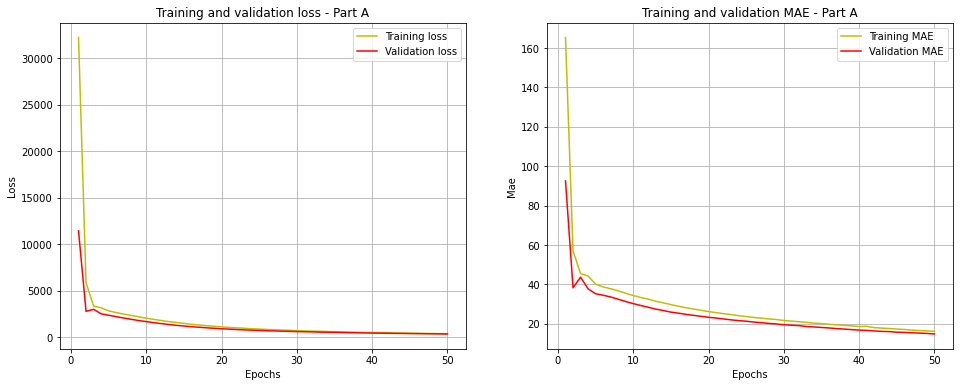

In [19]:
fig, ax = plt.subplots(figsize=(16,6))
#Set up the plot axes
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan = 1)

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Training loss')
ax1.plot(epochs, val_loss, 'r', label='Validation loss')
ax1.set_title('Training and validation loss - Part A')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid()



#mae_history = history.history["mae"]
acc = history.history['mae']
val_acc = history.history['val_mae']
#mean_absolute_error = history.history['val_mean_absolute_error']
ax2.plot(epochs, acc, 'y', label='Training MAE')
ax2.plot(epochs, val_acc, 'r', label='Validation MAE')
ax2.set_title('Training and validation MAE - Part A')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mae')
ax2.legend()
ax2.grid()



plt.show()


*We can plot the loss function to see the performance of the modeling process.*

In [20]:
#For the modified run, we are going to use train split rather that predictors, Target


In [21]:
############################################
#Predict on test data
predictions = model.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
##############################################

Predicted values are:  [[10.985246]
 [23.424103]
 [25.63446 ]
 [ 5.927335]
 [ 7.202319]]
Real values are:  62      9.87
880    12.18
520    13.40
195    24.99
127    55.50
Name: Strength, dtype: float64


In [22]:
#Sample of predicted data is taken for visualization
predictions = model.predict(X_test[:100])

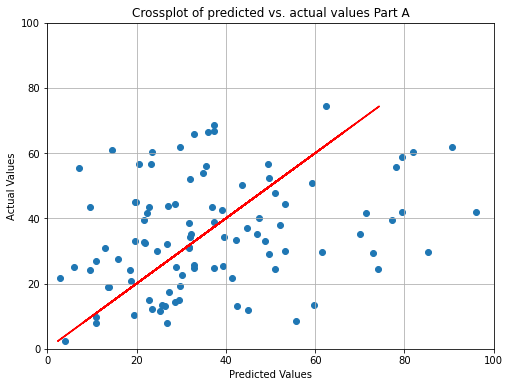

In [23]:
fig, ax = plt.subplots(figsize=(8,6))


#plot the training and validation accuracy and loss at each epoch

ax.set_title('Crossplot of predicted vs. actual values Part A')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.grid()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

ax.scatter(predictions, y_test[:100])

#Define line that shows perfect match
ax.plot(y_test[:100], y_test[:100], c='red')

plt.show()

**Plot above shows that we have a relatively poor correlation**

<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Conducting 50 runs on the model now </b></center>
</div>

In [24]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    return model

In [25]:
model = regression_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mean_squared_error = []

for i in range(0, 50):
    #X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)
    history = model.fit(X_train, y_train, epochs =50)
    mse_neural = model.evaluate(X_test, y_test)
    #scores = model.evaluate(X_test, y_test)
    print("\nMean Squared Error " + str(i) + ": {}".format(mse_neural))
    mean_squared_error.append(mse_neural)

Epoch 1/50
23/23 [==============================] - 0s 589us/step - loss: 436511.8125
Epoch 2/50
23/23 [==============================] - 0s 635us/step - loss: 307796.7812
Epoch 3/50
23/23 [==============================] - 0s 544us/step - loss: 214741.4531
Epoch 4/50
23/23 [==============================] - 0s 589us/step - loss: 147342.1094
Epoch 5/50
23/23 [==============================] - 0s 589us/step - loss: 98942.1250
Epoch 6/50
23/23 [==============================] - 0s 544us/step - loss: 64426.9453
Epoch 7/50
23/23 [==============================] - 0s 544us/step - loss: 40482.5859
Epoch 8/50
23/23 [==============================] - 0s 589us/step - loss: 24486.1250
Epoch 9/50
23/23 [==============================] - 0s 589us/step - loss: 14213.7256
Epoch 10/50
23/23 [==============================] - 0s 589us/step - loss: 8054.9478
Epoch 11/50
23/23 [==============================] - 0s 569us/step - loss: 4520.6909
Epoch 12/50
23/23 [==============================] - 0s 589us

<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> mean and standard deviation of computed mse</b></center>
</div>

**Mean of mse of 50 runs**

The output from runs above is a list, we convert it to DataFrame and use built in functions for mean and Standard Deviation

In [37]:
mse = pd.DataFrame(mean_squared_error, columns=["MSE"])

In [38]:
mse.mean()

MSE    75.160512
dtype: float64

In [39]:
mse.std()

MSE    107.202254
dtype: float64

### For this step we see a relatively high mse and std of 75.2 and 107.2 respectively.

<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Further QC Steps conducted on generated data </b></center>
</div>

In [40]:
#Show the first 5 values of mse
mean_squared_error[0:5]

[705.1194458007812,
 375.72308349609375,
 239.36390686035156,
 161.13668823242188,
 119.13479614257812]

In [41]:
#Place mse list into Pandas dataframe
mse = pd.DataFrame(mean_squared_error, columns=["MSE"])
mse.head()

,MSE
0,705.119446
1,375.723083
2,239.363907
3,161.136688
4,119.134796


In [42]:
#Descriptive statistics for computed mse
mse.describe()

,MSE
count,50.000000
mean,75.160512
std,107.202254
min,40.227272
25%,42.756420
50%,44.550554
75%,48.209879
max,705.119446


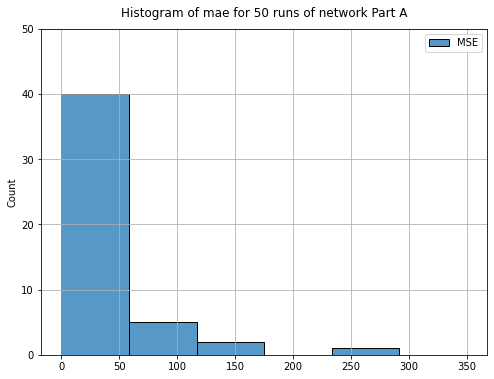

In [43]:
plt.figure(figsize=(8, 6))
#Visualization of mse
bins = np.linspace(0, 350, 7)
sns.histplot(mse, bins=bins)

plt.ylim(0, 50)

plt.title("Histogram of mae for 50 runs of network Part A", loc='center', pad=12.0)

#Visualization of mse
#sns.histplot(mse, bins=5)
plt.grid()
plt.show()



In [44]:
############################################
#Predict on test data
predictions = model.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
##############################################

Predicted values are:  [[15.912129]
 [24.569979]
 [19.316816]
 [22.284552]
 [58.248215]]
Real values are:  62      9.87
880    12.18
520    13.40
195    24.99
127    55.50
Name: Strength, dtype: float64


In [45]:
#Sample of predicted data is taken for visualization
predictions = model.predict(X_test[:100])

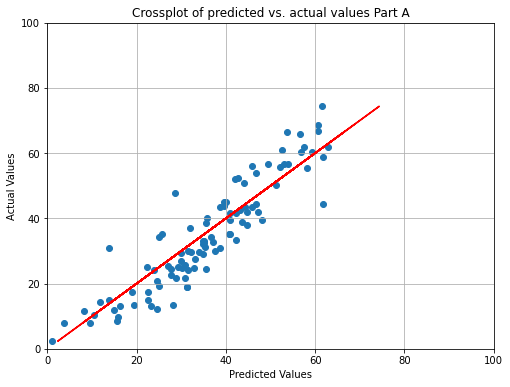

In [46]:
fig, ax = plt.subplots(figsize=(8,6))


#plot the training and validation accuracy and loss at each epoch

ax.set_title('Crossplot of predicted vs. actual values Part A')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.grid()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

ax.scatter(predictions, y_test[:100])

#Define line that shows perfect match
ax.plot(y_test[:100], y_test[:100], c='red')

plt.show()

**The above shows that we have a reasonable correlation between prediction and actual after 50 epochs**